In [1]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr 
import matplotlib.pyplot as plt
import dask 

In [2]:
dsst1 = xr.open_dataset('./sst20192020_may-sept_daily/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1667820053452.nc')
dsst2 = xr.open_dataset('./sst20192020_may-sept_daily/METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1667820176694.nc')

In [3]:
dchl1= xr.open_dataset('./chl20192020_may-sept_daily_regrid/cmems_obs-oc_glo_bgc-plankton_my_l3-olci-4km_P1D_1667820355623.nc')
dchl2= xr.open_dataset('./chl20192020_may-sept_daily_regrid/cmems_obs-oc_glo_bgc-plankton_my_l3-olci-4km_P1D_1667820421864.nc')

In [4]:
dsst = xr.open_mfdataset('./sst20192020_may-sept_daily/*.nc')

In [5]:
dchl = xr.open_mfdataset('./chl20192020_may-sept_daily_regrid/*.nc')

In [6]:
dchl

<xarray.Dataset>
Dimensions:  (time: 306, lat: 201, lon: 261)
Coordinates:
  * time     (time) datetime64[ns] 2019-05-01 2019-05-02 ... 2020-09-30
  * lat      (lat) float64 1.975 2.025 2.075 2.125 ... 11.82 11.87 11.92 11.97
  * lon      (lon) float64 44.98 45.02 45.07 45.12 ... 57.82 57.87 57.92 57.97
Data variables:
    CHL      (time, lat, lon) float32 dask.array<chunksize=(153, 201, 261), meta=np.ndarray>

In [7]:
dsst

<xarray.Dataset>
Dimensions:           (lon: 261, time: 306, lat: 201)
Coordinates:
  * lon               (lon) float32 44.97 45.03 45.08 ... 57.88 57.92 57.97
  * time              (time) datetime64[ns] 2019-05-01T12:00:00 ... 2020-09-3...
  * lat               (lat) float32 1.975 2.025 2.075 ... 11.88 11.93 11.98
Data variables:
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(153, 201, 261), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(153, 201, 261), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(153, 201, 261), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(153, 201, 261), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:                                 GHRSST Project Office
    publisher_url:                                  http://www.ghrsst.org
    publisher_email:                                ghrsst-po@nceo.ac.uk
    processing_level:                               L4
    cdm_data_type:                                  grid
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [8]:
def is_june(mon):
    return (mon == 6)

In [9]:
dchl_june = dchl.sel(time = is_june(dchl['time.month']))
dsst_june = dsst.sel(time = is_june(dsst['time.month']))

In [10]:
dchl_june

<xarray.Dataset>
Dimensions:  (time: 60, lat: 201, lon: 261)
Coordinates:
  * time     (time) datetime64[ns] 2019-06-01 2019-06-02 ... 2020-06-30
  * lat      (lat) float64 1.975 2.025 2.075 2.125 ... 11.82 11.87 11.92 11.97
  * lon      (lon) float64 44.98 45.02 45.07 45.12 ... 57.82 57.87 57.92 57.97
Data variables:
    CHL      (time, lat, lon) float32 dask.array<chunksize=(30, 201, 261), meta=np.ndarray>

In [11]:
dsst_june

<xarray.Dataset>
Dimensions:           (lon: 261, time: 60, lat: 201)
Coordinates:
  * lon               (lon) float32 44.97 45.03 45.08 ... 57.88 57.92 57.97
  * time              (time) datetime64[ns] 2019-06-01T12:00:00 ... 2020-06-3...
  * lat               (lat) float32 1.975 2.025 2.075 ... 11.88 11.93 11.98
Data variables:
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(30, 201, 261), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(30, 201, 261), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(30, 201, 261), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(30, 201, 261), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:                                 GHRSST Project Office
    publisher_url:                                  http://www.ghrsst.org
    publisher_email:                                ghrsst-po@nceo.ac.uk
    processing_level:                               L4
    cdm_data_type:                                  grid
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [12]:
chl_june= dchl_june.CHL.mean(dim='time')
chl_june

<xarray.DataArray 'CHL' (lat: 201, lon: 261)>
dask.array<mean_agg-aggregate, shape=(201, 261), dtype=float32, chunksize=(201, 261), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1.975 2.025 2.075 2.125 ... 11.82 11.87 11.92 11.97
  * lon      (lon) float64 44.98 45.02 45.07 45.12 ... 57.82 57.87 57.92 57.97

In [13]:
sst_june= dsst_june.analysed_sst.mean(dim='time')
sst_june

<xarray.DataArray 'analysed_sst' (lat: 201, lon: 261)>
dask.array<mean_agg-aggregate, shape=(201, 261), dtype=float32, chunksize=(201, 261), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 44.97 45.03 45.08 45.12 ... 57.83 57.88 57.92 57.97
  * lat      (lat) float32 1.975 2.025 2.075 2.125 ... 11.82 11.88 11.93 11.98

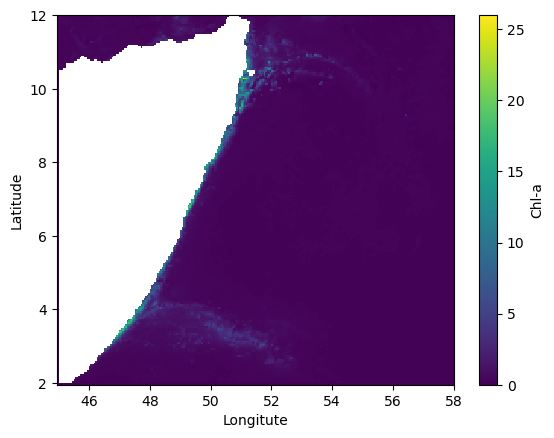

In [14]:
chl_june.plot(cbar_kwargs = {"label": "Chl-a"})
plt.xlabel("Longitute")
plt.ylabel("Latitude")
plt.savefig('chl_june1920.png', dpi=300)

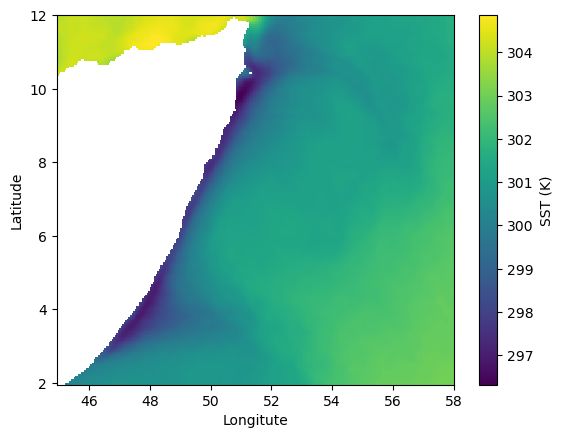

In [15]:
sst_june.plot(cbar_kwargs = {"label": "SST (K)"})
plt.xlabel("Longitute")
plt.ylabel("Latitude")
plt.savefig('sst_june1920.png', dpi=300)

In [16]:
chljune = chl_june.to_numpy().flatten()
sstjune = sst_june.to_numpy().flatten()
lat=dchl.coords['lat'].to_numpy()
lon=dchl.coords['lon'].to_numpy()

In [17]:
d={'chl_june':chljune,'sst_june':sstjune}    #dictionary 
df= pd.DataFrame(data=d)       

In [18]:
df.isna().sum()

chl_june    14862
sst_june    14617
dtype: int64

In [19]:
df = df.apply (pd.to_numeric, errors='coerce') 

In [20]:
#df.interpolate(method='linear', axis=0, limit=None, inplace=True, limit_direction=None, limit_area=None, downcast=None)
#df1 does not have nan values

In [21]:
df1 = df.dropna() 

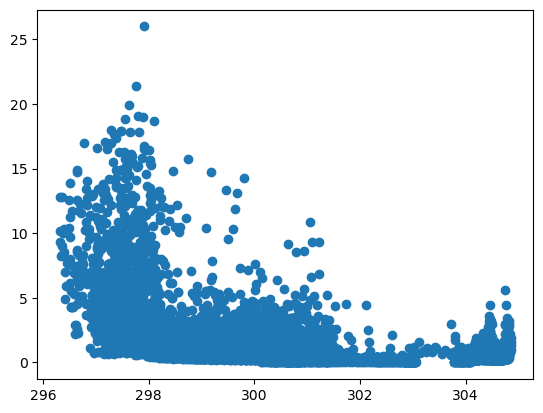

In [22]:
plt.scatter(df.sst_june,df.chl_june)

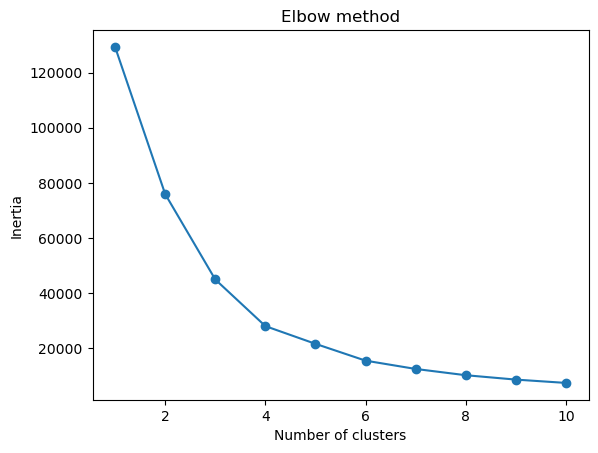

In [23]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('elbow.png', dpi=300)

In [24]:
from matplotlib.colors import ListedColormap
ccmap = ListedColormap([ "midnightblue", "cyan", "yellow","deeppink"])

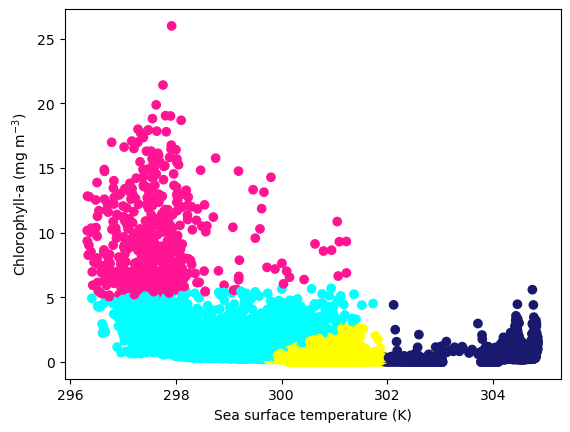

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df1)

plt.scatter(df1.sst_june,df1.chl_june, c=kmeans.labels_, cmap= ccmap)

plt.xlabel("Sea surface temperature (K)")
plt.ylabel("Chlorophyll-a (mg m$^{-3}$)")
plt.savefig('cl1.png', dpi=300)

In [26]:
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df1)

# plt.scatter(df1.sst_june,df1.chl_june, c=kmeans.labels_)
# plt.show()

In [27]:
type(kmeans.labels_)

numpy.ndarray

In [28]:
np.shape(kmeans.labels_)

(37427,)

In [29]:
#clusters = np.reshape(kmeans.labels_,(201,261))
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

In [30]:
df1['kmeans.labels'] = kmeans.labels_
df1

C:\Users\hp\AppData\Local\Temp\ipykernel_20920\3943750350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['kmeans.labels'] = kmeans.labels_


,chl_june,sst_june,kmeans.labels
5,0.000000,300.119995,2
6,0.000000,300.146149,2
7,0.000000,300.190613,2
8,0.000000,300.234436,2
9,0.000000,300.272278,2
...,...,...,...
52456,0.084945,301.558014,2
52457,0.159341,301.594025,2
52458,0.111276,301.622162,2
52459,0.131067,301.648163,2


In [31]:
df1.rename({'chl_june':'chl2','sst_june':'sst2'},axis=1, inplace=True)
df1

C:\Users\hp\AppData\Local\Temp\ipykernel_20920\3851443501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename({'chl_june':'chl2','sst_june':'sst2'},axis=1, inplace=True)


,chl2,sst2,kmeans.labels
5,0.000000,300.119995,2
6,0.000000,300.146149,2
7,0.000000,300.190613,2
8,0.000000,300.234436,2
9,0.000000,300.272278,2
...,...,...,...
52456,0.084945,301.558014,2
52457,0.159341,301.594025,2
52458,0.111276,301.622162,2
52459,0.131067,301.648163,2


In [32]:
#outter join
dfjoin = pd.concat([df, df1], join = "outer", axis=1)
dfjoin.drop(columns = ['chl2', 'sst2'], inplace= True)
dfjoin

,chl_june,sst_june,kmeans.labels
0,0.000000,NaN,NaN
1,0.000000,NaN,NaN
2,0.000000,NaN,NaN
3,0.000000,NaN,NaN
4,0.000000,NaN,NaN
...,...,...,...
52456,0.084945,301.558014,2.0
52457,0.159341,301.594025,2.0
52458,0.111276,301.622162,2.0
52459,0.131067,301.648163,2.0


In [33]:
karray = dfjoin['kmeans.labels'].to_numpy()
karray

array([nan, nan, nan, ...,  2.,  2.,  2.])

In [34]:
karray2d = np.reshape(karray, (201,261))
karray2d

array([[nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  2.,  2.],
       [ 0.,  0.,  0., ...,  2.,  2.,  2.],
       [ 0.,  0.,  0., ...,  2.,  2.,  2.]])

In [35]:
clusters = xr.DataArray(
    data=karray2d,
    dims=["lat", "lon"],
    coords=dict(
        lon=(["lon"], lon),
        lat=(["lat"], lat),
    ),
)

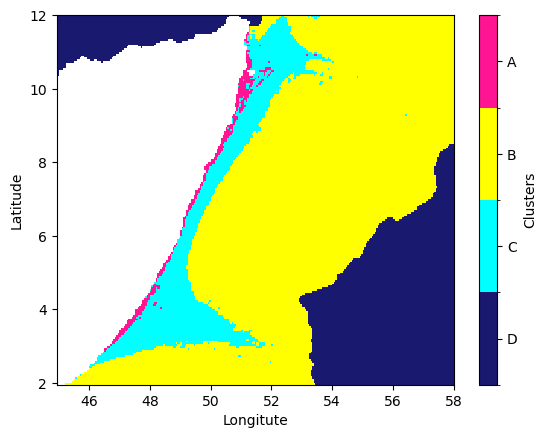

In [36]:
mesh = clusters.plot(levels = [0,1,2,3,4], add_colorbar = False, cmap= ccmap)
cbar = plt.colorbar(mesh, label = "Clusters")
cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
cbar.set_ticklabels(["D", "C", "B", "A"])

plt.xlabel("Longitute")
plt.ylabel("Latitude")
plt.savefig('map1_june1920.png', dpi=300)

In [37]:
# lat1d =[]
# lon1d =[]
# for i in range(len(lat)):
#     for j in range(len(lon)):
#         lat1d.append(lat[i])
#         lon1d.append(lon[i])

In [38]:
# d2={'chl_june':chljune,'sst_june':sstjune}    #dictionary 
# df2= pd.DataFrame(data=d2)
# df2 = df2.apply (pd.to_numeric, errors='coerce')
# df2 = df2.dropna()